# Data Quality Report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
#below to allow for all columns in csv to display
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## read data into data frame, ignoring whitespace

In [2]:
df = pd.read_csv('CustomerChurn-12751005.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

## dispaying how many row and columns in the data i.e. 1000 rows, 33 columns

In [3]:
print("Number of rows is:",df.shape[0],"Number of columns is:", df.shape[1])

Number of rows is: 1000 Number of columns is: 33


## Print the first and the last 5 rows.

In [4]:
df.head(5)

customer  age    occupation regionType marriageStatus  children  income  numHandsets  handsetAge  smartPhone  currentHandsetPrice creditRating  homeOwner creditCard  avgBill  avgMins  avgrecurringCharge  avgOverBundleMins  avgRoamCalls  callMinutesChangePct  billAmountChangePct  avgReceivedMins  avgOutCalls  avgInCalls  peakOffPeakRatio  peakOffPeakRatioChangePct  avgDroppedCalls  lifeTime  lastMonthCustomerCareCalls  numRetentionCalls  numRetentionOffersAccepted  newFrequentNumbers  churn
0   1093646   28           NaN        NaN             no     False       6            2         220        True                29.99            E      False       true    76.09  1290.75               59.99              54.50           2.6                 4.685              -0.4388           240.34        51.33       11.67          0.901895                  16.012870             5.00        10                       21.67                  0                           0                   0   True
1   1033207   52  professional       town             no     False       1            1         730        True                 0.00            C       True      false    35.59   208.25               30.25              11.25           0.0                 0.615               1.0352            91.06         3.33        9.33          1.529568                  20.921980             1.33        25                        0.00                  0                           0                   0   True
2   1037740   24           NaN        NaN        unknown     False       0            1         574        True                 0.00            E       True      false    79.95   522.00               84.98               0.00           0.0                 5.340               0.1998           103.01        32.67       12.33          0.928293                 -11.860777             1.00        19                        1.67                  0                           0                   0  False
3   1068745   44           NaN   suburban            yes      True       9            1         329        True                 0.00            B      False       true    52.49   449.25               39.99              90.75           0.0                -4.265              -0.4500             0.00         0.00        0.00          0.000000                  21.730942             0.00        11                        0.00                  0                           0                   0   True
4   1075412   50           NaN   suburban        unknown     False       7            1         336        True                 0.00            B       True      false    34.99   191.75               44.99               0.00           0.0                 0.045               0.0000            44.57         7.67        6.67          1.608413                  10.314695            15.00        12                        0.00                  0                           0                   0  False

In [5]:
df.tail(5)

customer  age    occupation regionType marriageStatus  children  income  numHandsets  handsetAge  smartPhone  currentHandsetPrice creditRating  homeOwner creditCard  avgBill  avgMins  avgrecurringCharge  avgOverBundleMins  avgRoamCalls  callMinutesChangePct  billAmountChangePct  avgReceivedMins  avgOutCalls  avgInCalls  peakOffPeakRatio  peakOffPeakRatioChangePct  avgDroppedCalls  lifeTime  lastMonthCustomerCareCalls  numRetentionCalls  numRetentionOffersAccepted  newFrequentNumbers  churn
995   1081523   58  professional        NaN            yes      True       7            1         313        True                 0.00            B      False       true    97.65   615.75               41.36             213.50           0.0                -9.295              -1.4602           264.74        11.00        1.67          1.134881                 -11.408605            18.33        11                        0.00                  0                           0                   0   True
996   1024091   54           NaN       town             no     False       8            2         725        True                29.99            E      False       true    89.78   605.50               49.99             128.50           0.0                -4.330              -0.7760           185.74        39.00       21.67          4.160516                  -3.779749             6.00        25                        0.00                  0                           0                   0   True
997   1059457    0           NaN        NaN        unknown     False       0            2         121        True                59.99            C       True      false    83.38  1133.50               50.00             131.25           0.0                 6.030               1.5074           258.16        44.00        7.00          0.696471                 -16.617508            63.00        13                       15.00                  0                           0                   0   True
998   1094149    0           NaN   suburban        unknown     False       0            4         143        True               129.99            E       True      false    50.49  1163.75               45.75               0.00           0.0                -7.215              -0.9900           385.43       154.67       52.67          1.755025                  -6.607509            11.33         9                        1.33                  0                           0                   0   True
999   1043561    0           NaN        NaN             no     False       5            2         187        True                29.99            E       True       true    56.71   661.75               52.37              42.75           0.0                -4.375              -0.4344           107.07        32.67        2.33          0.669868                   0.737549            10.33        17                        0.00                  0                           0                   0   True

## Convert the features to their appropriate data types

In [6]:
#displaying types
df.dtypes

customer                        int64
age                             int64
occupation                     object
regionType                     object
marriageStatus                 object
children                         bool
income                          int64
numHandsets                     int64
handsetAge                      int64
smartPhone                       bool
currentHandsetPrice           float64
creditRating                   object
homeOwner                        bool
creditCard                     object
avgBill                       float64
avgMins                       float64
avgrecurringCharge            float64
avgOverBundleMins             float64
avgRoamCalls                  float64
callMinutesChangePct          float64
billAmountChangePct           float64
avgReceivedMins               float64
avgOutCalls                   float64
avgInCalls                    float64
peakOffPeakRatio              float64
peakOffPeakRatioChangePct     float64
avgDroppedCa

After analysing all of the object and bool columns, I decided to convert them to categorical

In [7]:
"""
Taken from Lab4
"""
# Select columns containing categorical data
categorical_columns = df[['occupation','regionType','marriageStatus','children','creditRating',
                          'homeOwner','creditCard','churn','smartPhone']].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

## Select continuous columns

In [8]:
continuous_columns = df.select_dtypes(include=['int64','float64']).columns

## Check for constant columns and remove if any found

In [9]:
constant_cols=False
for column in categorical_columns:
    if df[column].nunique()==1:
        df = df.drop(column,1)
        constant_cols=True
        
for column in continuous_columns:
    if df[column].nunique()==1:
        df = df.drop(column,1)
        constant_cols=True
        
if constant_cols:
    print("contant columns have been removed")
else:
    print("no constant columns found")

no constant columns found


## No duplicate columns, so save cleaned df to csv

In [10]:
df_cleaned = df

In [11]:
df_cleaned.to_csv('CustomerChurnCleaned12751005.csv', index=False)

## Save table with descriptive statistics for all the continuous features in CSV file

In [12]:
"""
Taken from Lab4
"""
## Save table with descriptive statistics for all the continuous features in CSV file
df[continuous_columns].describe().T.to_csv('continuous_descriptive_stats.csv')

#Print table
df[continuous_columns].describe().T

count          mean           std           min           25%           50%           75%           max
customer                    1000.0  1.051046e+06  28686.806727  1.000004e+06  1.025288e+06  1.052374e+06  1.074990e+06  1.099882e+06
age                         1000.0  2.950000e+01     22.347112  0.000000e+00  0.000000e+00  3.400000e+01  4.600000e+01  9.000000e+01
income                      1000.0  4.249000e+00      3.124862  0.000000e+00  0.000000e+00  5.000000e+00  7.000000e+00  9.000000e+00
numHandsets                 1000.0  1.759000e+00      1.298694  1.000000e+00  1.000000e+00  1.000000e+00  2.000000e+00  2.100000e+01
handsetAge                  1000.0  3.898020e+02    261.911226 -1.000000e+00  2.137500e+02  3.380000e+02  5.060000e+02  1.812000e+03
currentHandsetPrice         1000.0  3.576583e+01     58.494544  0.000000e+00  0.000000e+00  0.000000e+00  3.999000e+01  4.999900e+02
avgBill                     1000.0  5.872940e+01     44.508932  0.000000e+00  3.312250e+01  4.925000e+01  7.186250e+01  5.039100e+02
avgMins                     1000.0  5.178685e+02    532.238351  0.000000e+00  1.486250e+02  3.616250e+02  7.177500e+02  6.103750e+03
avgrecurringCharge          1000.0  4.645945e+01     23.186612  0.000000e+00  3.000000e+01  4.499000e+01  5.999000e+01  2.001500e+02
avgOverBundleMins           1000.0  4.198217e+01    109.915453  0.000000e+00  0.000000e+00  3.500000e+00  4.518750e+01  1.912500e+03
avgRoamCalls                1000.0  1.301150e+00      6.097038  0.000000e+00  0.000000e+00  0.000000e+00  2.900000e-01  7.731000e+01
callMinutesChangePct        1000.0 -3.272966e-01      5.072946 -2.976500e+01 -1.863750e+00 -1.475000e-01  1.160000e+00  4.400500e+01
billAmountChangePct         1000.0 -2.024500e-02      0.717653 -5.568000e+00 -1.353000e-01 -5.400000e-03  3.395000e-02  4.874400e+00
avgReceivedMins             1000.0  1.087237e+02    168.709024  0.000000e+00  6.712500e+00  4.601000e+01  1.444175e+02  1.817740e+03
avgOutCalls                 1000.0  2.564905e+01     37.464370  0.000000e+00  2.670000e+00  1.233000e+01  3.441500e+01  4.183300e+02
avgInCalls                  1000.0  8.337530e+00     17.790787  0.000000e+00  0.000000e+00  1.670000e+00  8.330000e+00  2.083300e+02
peakOffPeakRatio            1000.0  2.006366e+00      2.672857  0.000000e+00  7.347782e-01  1.291601e+00  2.368970e+00  3.839394e+01
peakOffPeakRatioChangePct   1000.0  5.572095e-01      9.842108 -3.332011e+01 -5.943932e+00  6.563163e-01  7.258809e+00  3.169322e+01
avgDroppedCalls             1000.0  9.733310e+00     16.378818  0.000000e+00  1.670000e+00  5.000000e+00  1.167000e+01  3.046700e+02
lifeTime                    1000.0  1.859000e+01      9.535136  6.000000e+00  1.100000e+01  1.600000e+01  2.500000e+01  6.000000e+01
lastMonthCustomerCareCalls  1000.0  1.905520e+00      4.794451  0.000000e+00  0.000000e+00  0.000000e+00  1.330000e+00  7.867000e+01
numRetentionCalls           1000.0  5.700000e-02      0.264236  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  3.000000e+00
numRetentionOffersAccepted  1000.0  2.600000e-02      0.177074  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  3.000000e+00
newFrequentNumbers          1000.0  1.970000e-01      0.645451  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  3.000000e+00

## Save a table with descriptive statistics for all the categorical features in a CSV file

In [13]:
"""
Taken from Lab4
"""
# Save table with descriptive statistics for all the categorical features in CSV file
df.select_dtypes(['category']).describe().T.to_csv('categorical_descriptive_stats.csv')

# Print table
df.select_dtypes(['category']).describe().T

count unique           top freq
occupation       255      7  professional  156
regionType       508      5      suburban  298
marriageStatus  1000      3       unknown  396
children        1000      2         False  763
smartPhone      1000      2          True  898
creditRating    1000      7             B  385
homeOwner       1000      2         False  632
creditCard      1000      6          true  647
churn           1000      2         False  501

## Create histograms for continuous features

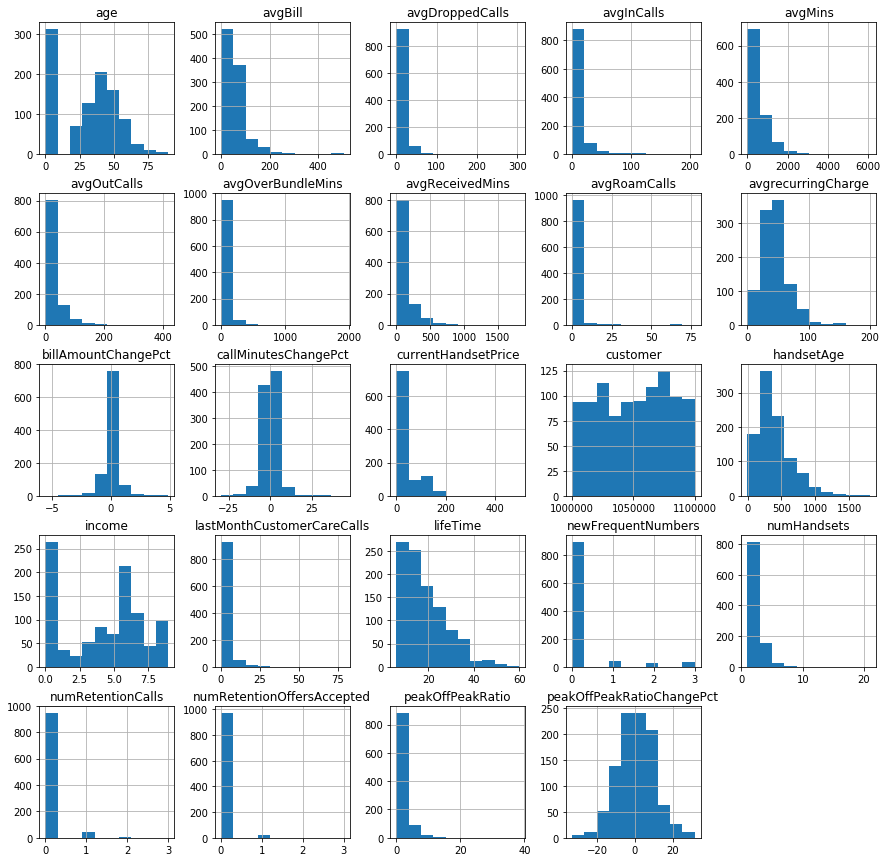

In [14]:
"""
Taken from Lab4
"""
# Plot a histogram of the continuous features and save in a PDF file
df_cleaned[continuous_columns].hist(figsize=(15,15))
plt.savefig('continuous_histograms.pdf')

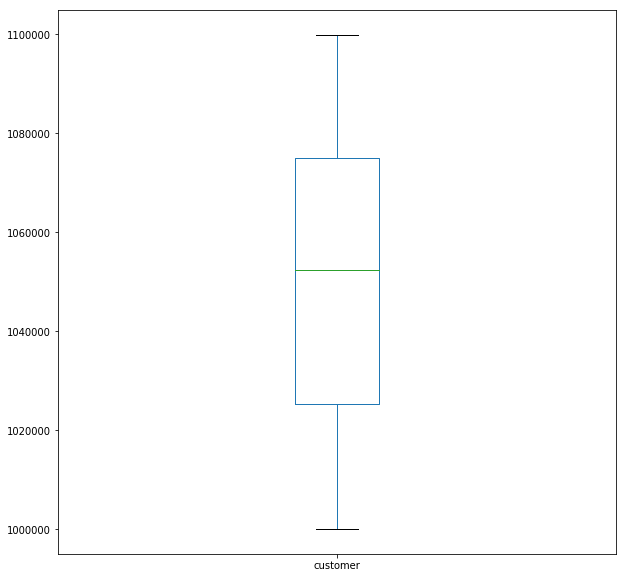

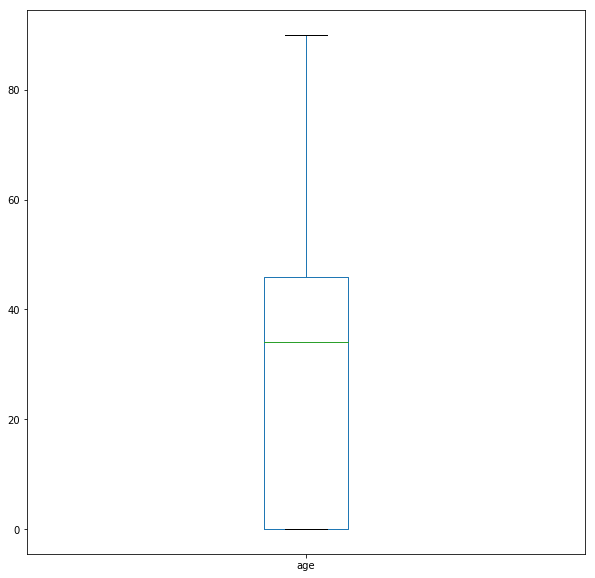

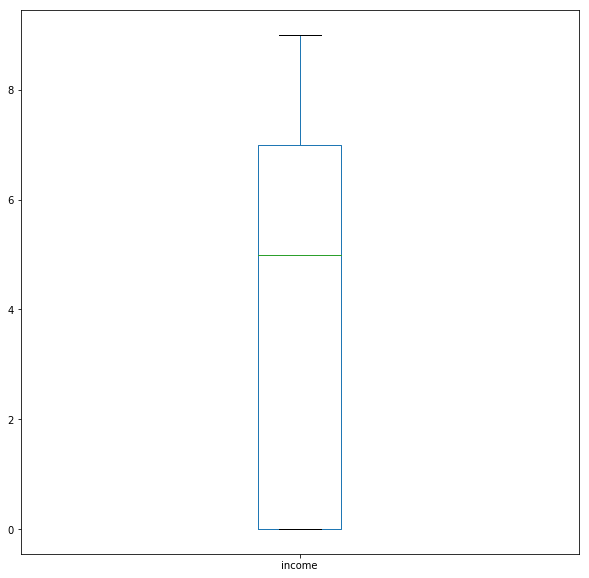

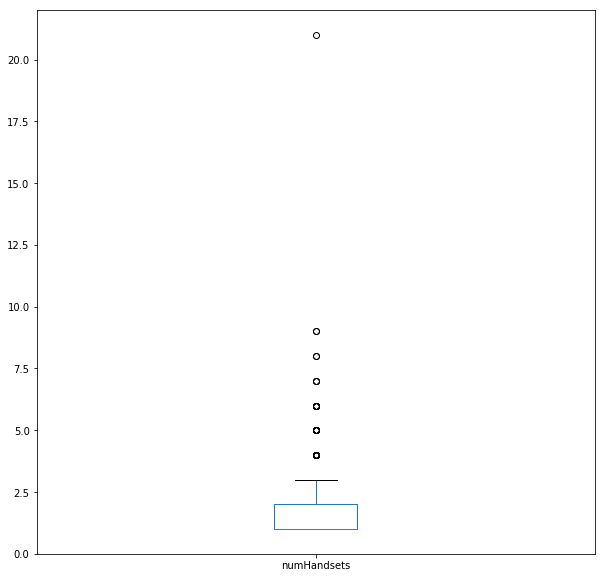

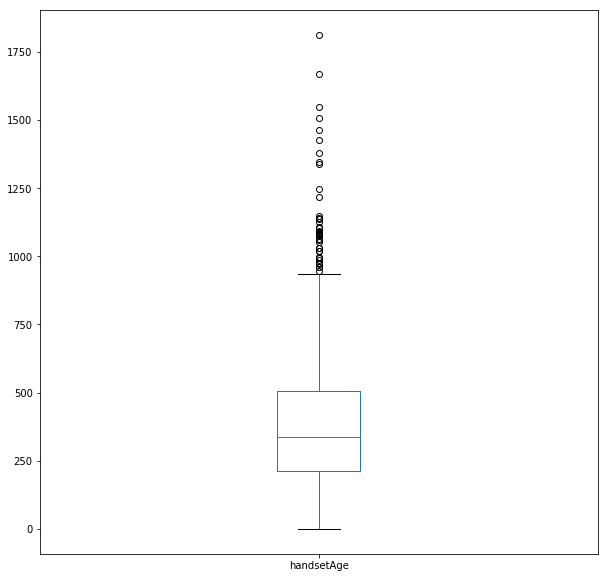

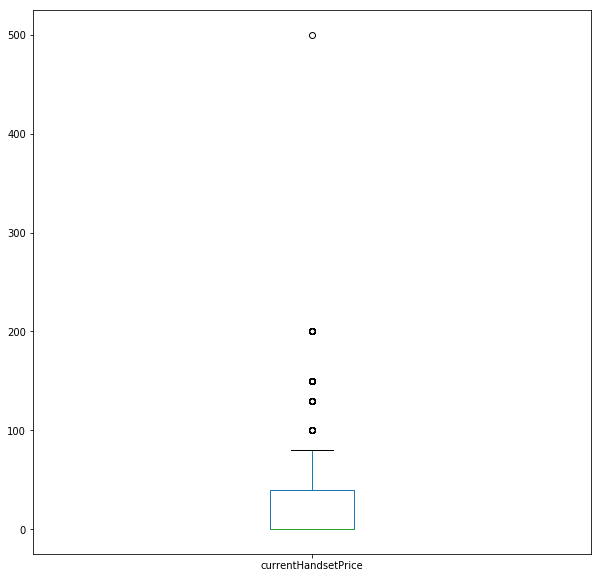

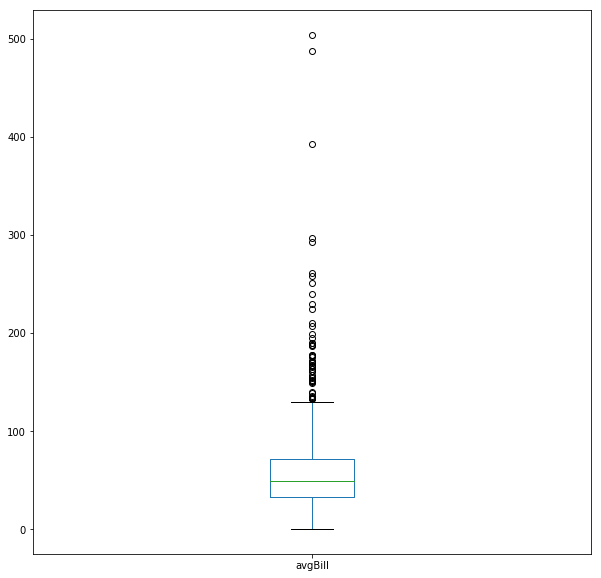

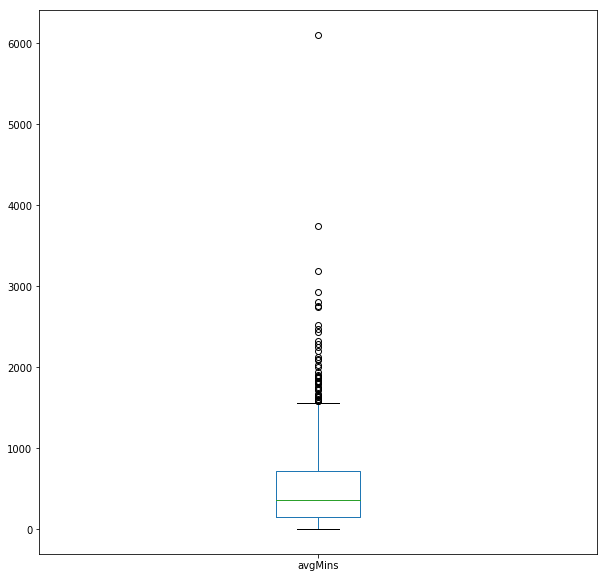

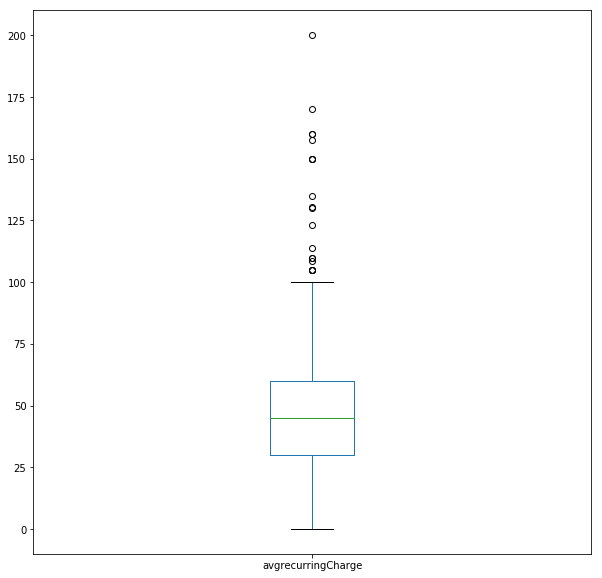

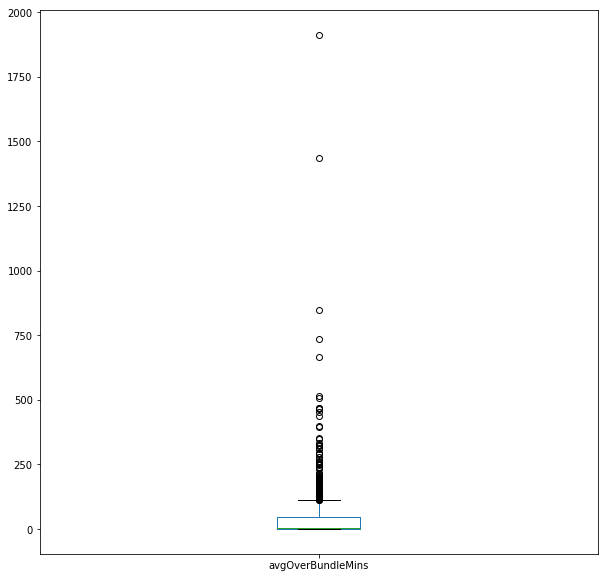

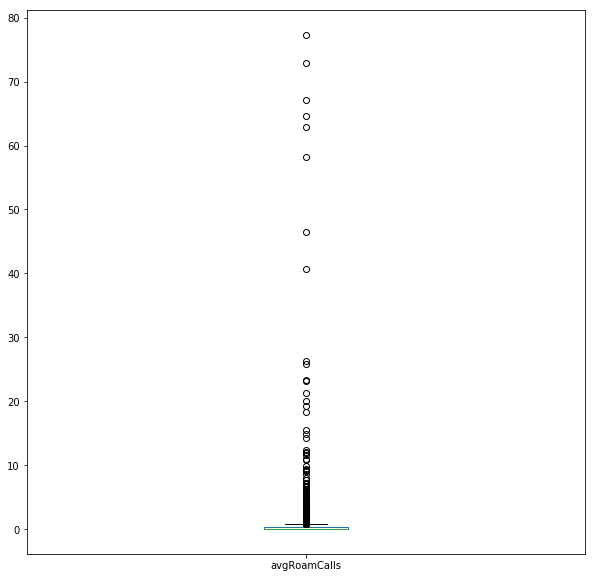

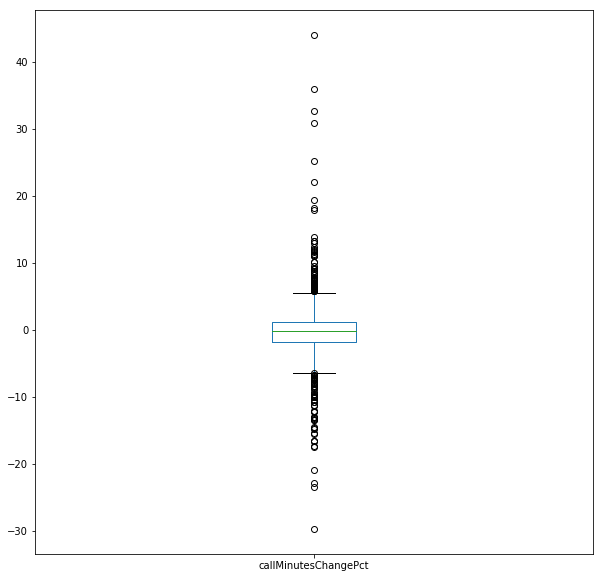

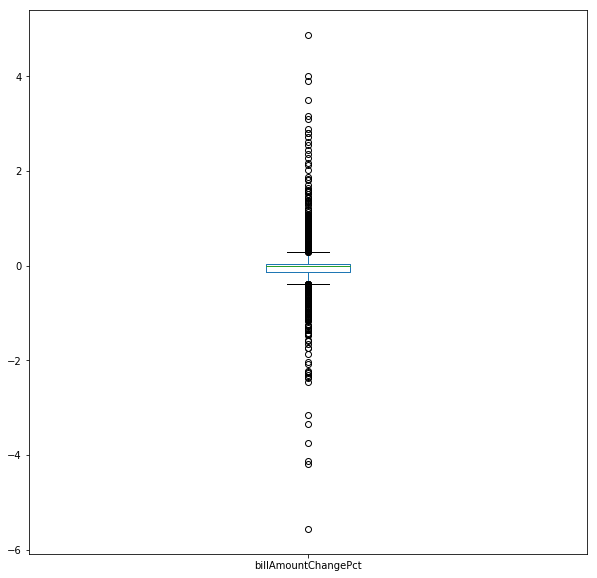

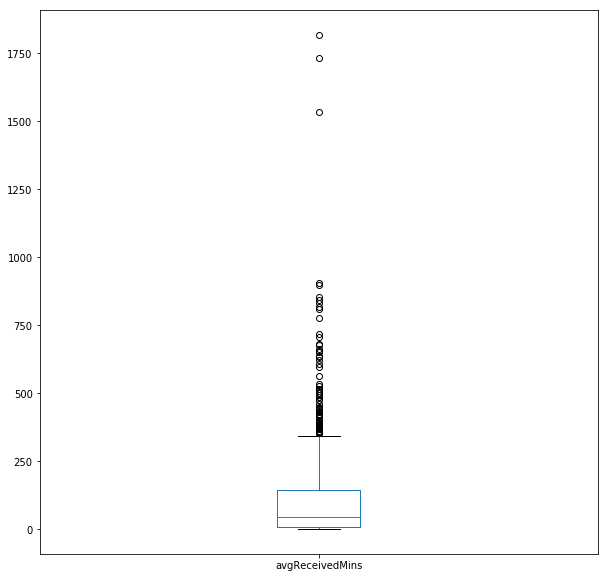

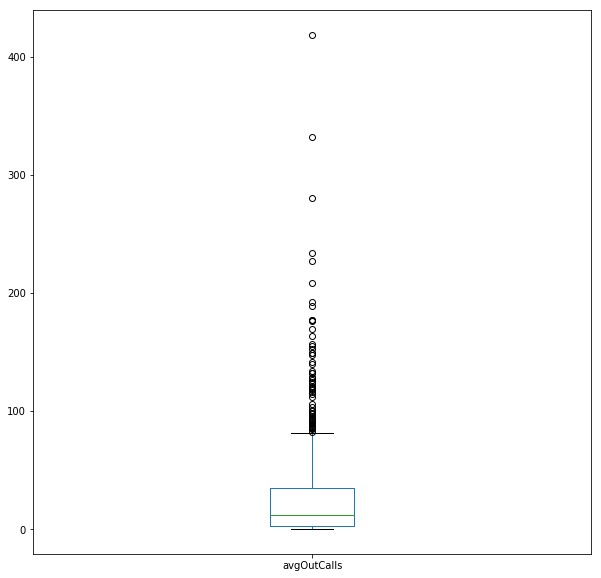

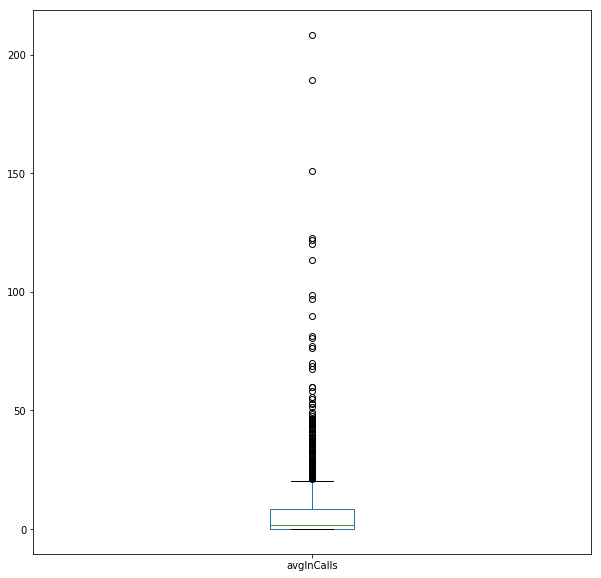

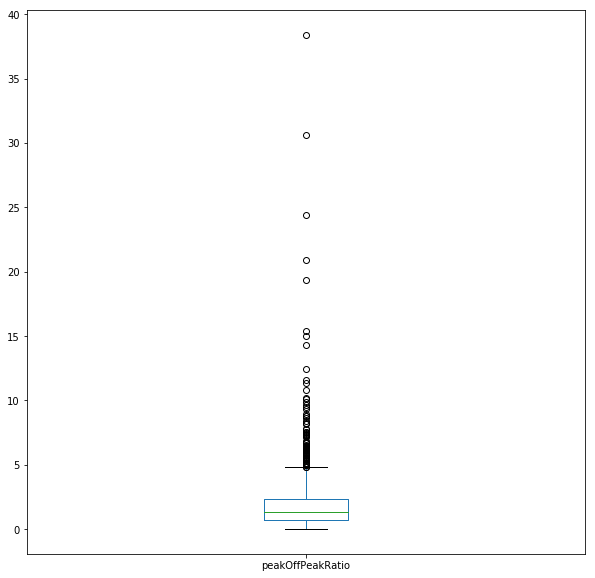

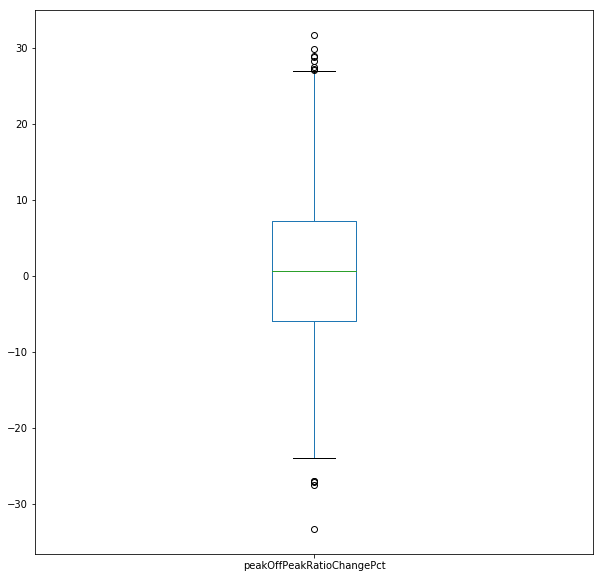

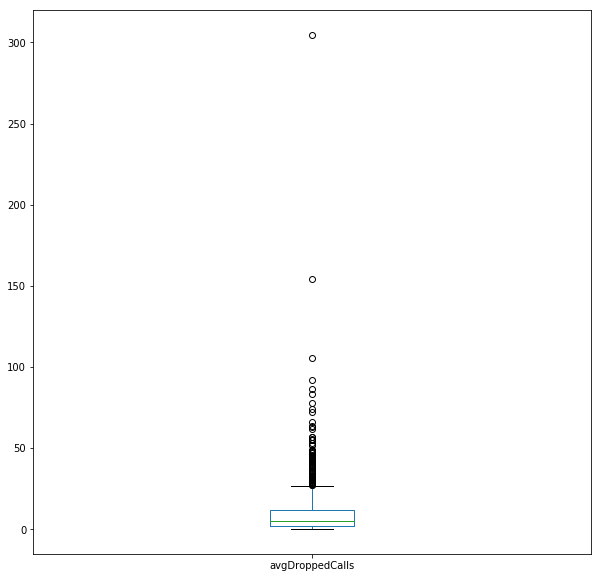

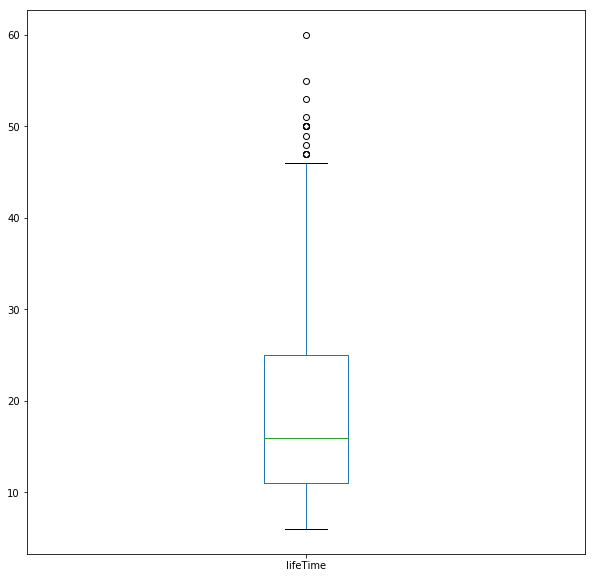

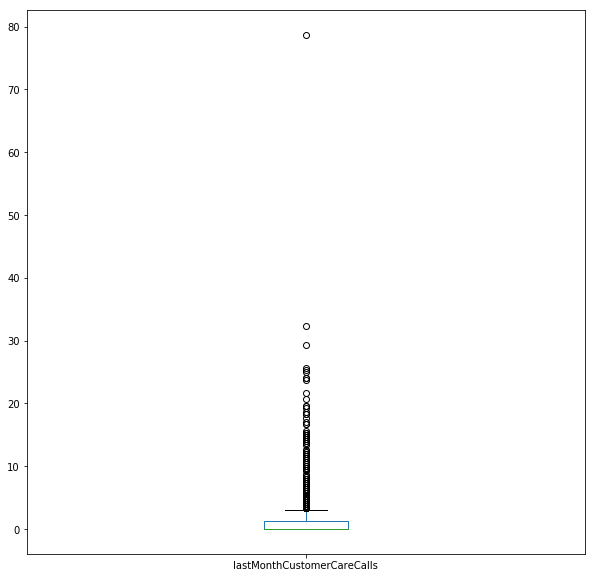

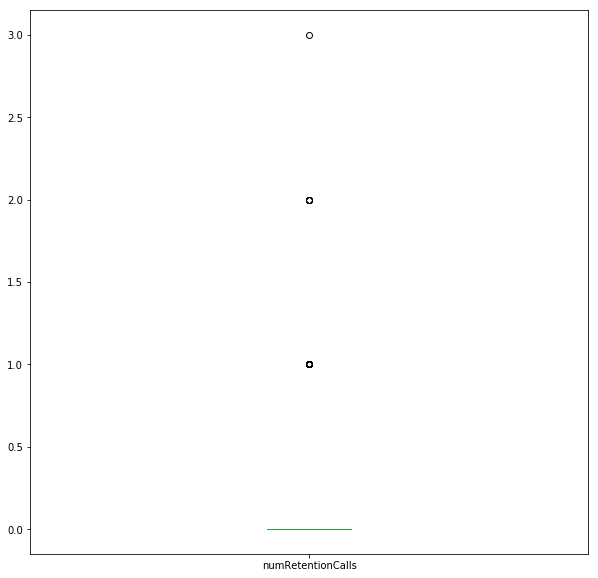

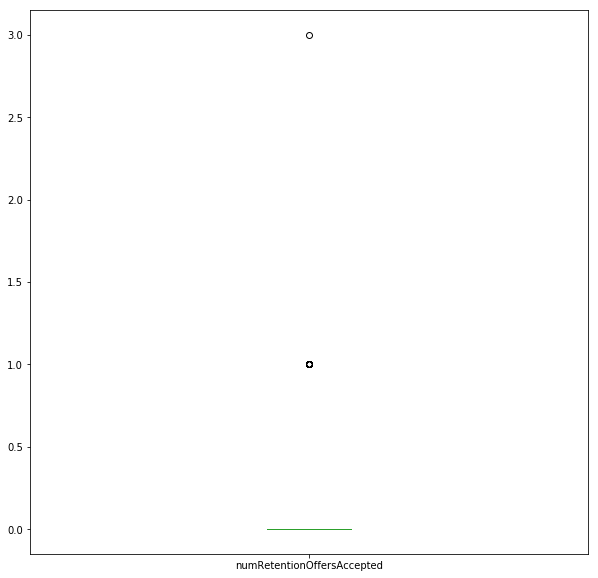

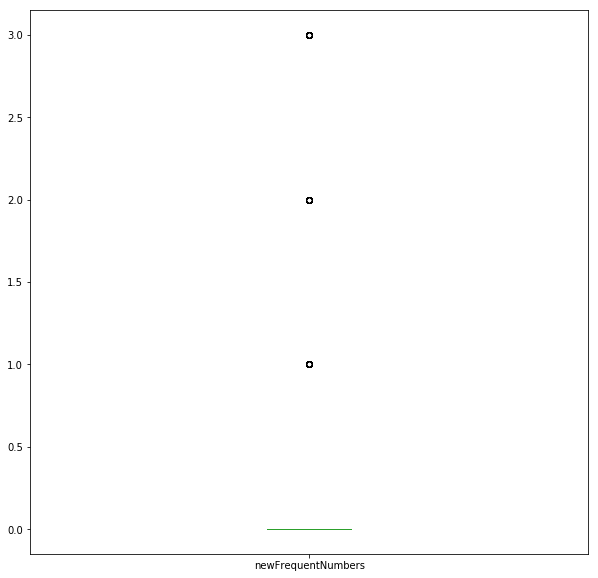

In [ ]:
"""
Taken from Lab4
"""
# Plot box plots for all the continuous features and save in a PDF file
pp = PdfPages('continuous_box_plots.pdf')

for col in continuous_columns:
    f = df[col].plot(kind='box', figsize=(10,10))
    pp.savefig(f.get_figure())
    plt.show()

    
pp.close()

## Plot Bar Plots for Categorical Features

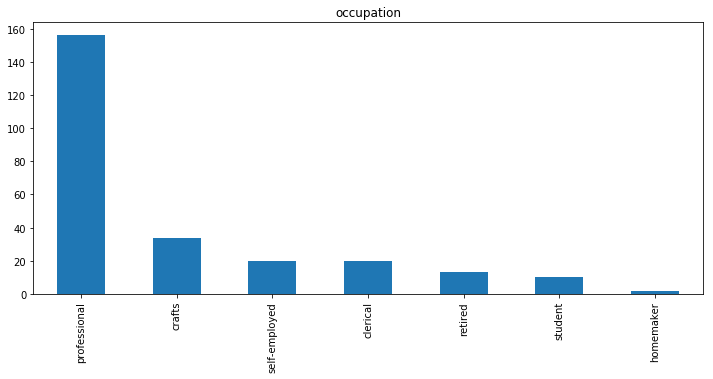

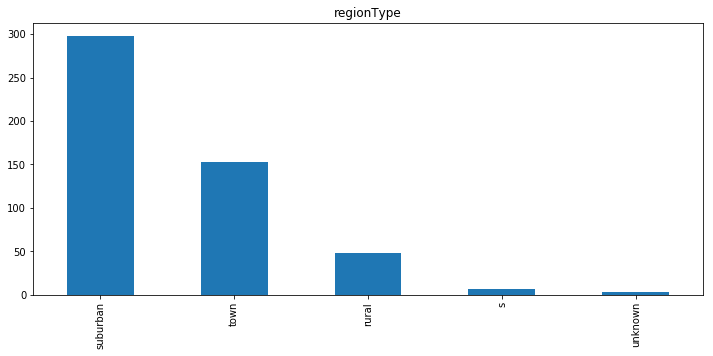

In [ ]:
"""
Taken from Lab4
"""
# Plot bar charts for all categorical features and save them in a single PDF file
pp = PdfPages('categorical_bar_charts.pdf')

for column in categorical_columns:
    f = df[column].value_counts().plot(kind='bar', title=column, figsize=(12,5))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

## Comments on Bar Plots

It is clear that some of thefeatures have irregualr cardinality such as creditCard and this will need to be addressed.

# Data quality plan

## Irregular cardinality

In [ ]:
"""
Taken from lab4
"""
# Check for irregular cardinality in categorical features. There could be same values spelled differently
print("Unique values for:\n\n- occupation:", pd.unique(df.occupation.ravel()))
print("\n- regionType:", pd.unique(df.regionType.ravel()))
print("\n- marriageStatus:", sorted(pd.unique(df.marriageStatus.ravel())))
print("\n- children:", sorted(pd.unique(df.children.ravel())))
print("\n- creditRating:", sorted(pd.unique(df.creditRating.ravel())))
print("\n- homeOwner:", sorted(pd.unique(df.homeOwner.ravel())))
print("\n- creditCard:", sorted(pd.unique(df.creditCard.ravel())))
print("\n- churn:", sorted(pd.unique(df.churn.ravel())))

Cardinality Issues: creditCard contains same values spelled differently

# Null Values

In [ ]:
"""
Taken from Lab4
"""
df_cleaned.isnull().sum()

occupation and region type have a large amount of missing data and should be removed

In [ ]:
#redefine continuous_columns and categorical_columns for df_cleaned
continuous_columns = df_cleaned.select_dtypes(include=['int64','float64']).columns
categorical_columns = df_cleaned.select_dtypes(include=['category']).columns

In [ ]:
for i in continuous_columns:
    print("Number of 0's in",i,"is",df[(df[i]==0)].shape[0])

Age and currentHandset price have a large amount of 0s whcih does not make sense. In the case of age I believe imputation makes sense as only ~30% of values are missing and age is an important feature. currentHandsetPrice has too many values missing to be of use and will be dropped. 

0 values make sense for the other continuous features, but it is worth mentioning why I decided to keep the 0 values for income since there are ~26% 0 values. I believe this isn't unreasonable for income as many of the customers may be dependents whose bill is paid for by someone else.

#  Outliers

Looking at the extreme values for outliers to try to determine if they are valid or errors in the data.

In [ ]:
df_cleaned.sort_values(by='numHandsets', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

In [ ]:
df_cleaned.sort_values(by='handsetAge', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

In [ ]:
df_cleaned.sort_values(by='currentHandsetPrice', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

In [ ]:
df_cleaned.sort_values(by='avgBill', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

In [ ]:
df_cleaned.sort_values(by='avgMins', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

In [ ]:
df_cleaned.sort_values(by='avgrecurringCharge', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

In [ ]:
df_cleaned.sort_values(by='avgOverBundleMins', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

In [ ]:
df_cleaned.sort_values(by='avgRoamCalls', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

In [ ]:
df_cleaned.sort_values(by='callMinutesChangePct', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

In [ ]:
df_cleaned.sort_values(by='callMinutesChangePct', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').tail(5)

In [ ]:
df_cleaned.sort_values(by='billAmountChangePct', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

In [ ]:
df_cleaned.sort_values(by='billAmountChangePct', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').tail(5)

In [ ]:
df_cleaned.sort_values(by='avgReceivedMins', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

In [ ]:
df_cleaned.sort_values(by='avgOutCalls', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

In [ ]:
df_cleaned.sort_values(by='avgInCalls', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

In [ ]:
df_cleaned.sort_values(by='peakOffPeakRatio', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

In [ ]:
df_cleaned.sort_values(by='peakOffPeakRatioChangePct', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

In [ ]:
df_cleaned.sort_values(by='peakOffPeakRatioChangePct', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').tail(5)

In [ ]:
df_cleaned.sort_values(by='avgDroppedCalls', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

In [ ]:
df_cleaned.sort_values(by='lifeTime', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

In [ ]:
df_cleaned.sort_values(by='lastMonthCustomerCareCalls', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

In [ ]:
df_cleaned.sort_values(by='numRetentionCalls', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

In [ ]:
df_cleaned.sort_values(by='numRetentionOffersAccepted', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

In [ ]:
df_cleaned.sort_values(by='newFrequentNumbers', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)


None of the features above have outliers which are completely unreasonable and it is impossible to verify the validitiy of the extreme values without conferring with those who collected the data. Therefore I have decided to do nothing and to accept the values as valid keep them in the dataset

# Duplicate Rows

In [ ]:
# Checking for duplicated rows
print(df_cleaned.set_index('customer').index.get_duplicates())
print(df_cleaned['customer'].nunique())

Since customer has a unique value ID for each row, there are no duplicate rows

# Addressing issues raised in data quality plan

| Feature                   | Data Quality Issue               | Handling Strategy                            |
|---------------------------|----------------------------------|----------------------------------------------|
| age                       | Missing Values (31.3%)           | Imputation - replace missing values with mean| 
| occupation                | Missing Values (74.5%)           | Drop feature                                 |
| regionType                | Missing Values (49.2%)           | Drop feature                                 |
| currentHandsetPrice       | Missing Values (58.3%)           | Drop feature                                 |
| marriageStatus            | Missing Values (39.6%)           | Drop feature                                 |
| customer                  | ID feature                       | Drop feature                                 |
| creditCard                | Irregular Cardinality            | Rename values                                |
| numHandsets               | Outliers                         | Do nothing                                   |
| handsetAge                | Outliers                         | Do nothing                                   |
| avgBill                   | Outliers                         | Do nothing                                   |
| avgMins                   | Outliers                         | Do nothing                                   |
| avgrecurringCharge        | Outliers                         | Do nothing                                   |
| avgOverBundleMins         | Outliers                         | Do nothing                                   |
| avgRoamCalls              | Outliers                         | Do nothing                                   |
| callMinutesChangePct      | Outliers                         | Do nothing                                   |
| billAmountChangePct       | Outliers                         | Do nothing                                   |
| avgReceivedMins           | Outliers                         | Do nothing                                   |
| avgOutCalls               | Outliers                         | Do nothing                                   |
| avgInCalls                | Outliers                         | Do nothing                                   |
| peakOffPeakRatioChangePct | Outliers                         | Do nothing                                   |
| avgDroppedCalls           | Outliers                         | Do nothing                                   |
| lifeTime                  | Outliers                         | Do nothing                                   |
| lastMonthCustomerCareCalls| Outliers                         | Do nothing                                   |
| numRetentionCalls         | Outliers                         | Do nothing                                   |
| numRetentionOffersAccepted| Outliers                         | Do nothing                                   |
| newFrequentNumbers        | Outliers                         | Do nothing                                   |

## Replace 0 values in age with mean

In [ ]:
df_cleaned.age.replace(to_replace=0,value=df['age'].mean(),inplace=True)

Rename same values which have different spellings in creditCard

In [ ]:
df_cleaned.creditCard.replace(to_replace='f',value='false',inplace=True)
df_cleaned.creditCard.replace(to_replace='no',value='false',inplace=True)
df_cleaned.creditCard.replace(to_replace='t',value='true',inplace=True)
df_cleaned.creditCard.replace(to_replace='yes',value='true',inplace=True)

## Drop features

In [ ]:
df_cleaned.drop('occupation',1,inplace=True)

In [ ]:
df_cleaned.drop('regionType',1,inplace=True)

In [ ]:
df_cleaned.drop('currentHandsetPrice',1,inplace=True)

In [ ]:
df_cleaned.drop('marriageStatus',1,inplace=True)

In [ ]:
df_cleaned.drop('customer',1,inplace=True)

# Save updated CSV after applying Data Quality Plan solutions

In [ ]:
df_cleaned.to_csv('CustomerChurnDataQualitySolutionsImplemented12751005.csv', index=False)

In [ ]:
df_quality = df_cleaned
continuous_columns = df_quality.select_dtypes(include=['int64','float64']).columns
categorical_columns = df_quality.select_dtypes(include=['category']).columns

# Exploring the relationships between feature pairs

## Correlation Matrix

In [ ]:
"""
Taken from Lab4
"""
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Select columns containing continuous data
# Calculate correlation of pairs of continuous features
columns = df_quality[['avgOverBundleMins','avgBill','numRetentionCalls','numRetentionOffersAccepted','avgOutCalls']].columns
corr = df_quality[columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

In [ ]:
df_quality.plot(kind='scatter', x='avgBill', y='avgOverBundleMins')
df_quality.plot(kind='scatter', x='numRetentionOffersAccepted', y='numRetentionCalls')
df_quality.plot(kind='scatter', x='avgBill', y='avgOutCalls')

I decided on the above features because I though there would be a correlation between avgBill and avgOutCalls and avgOverBundleMins as well as between numRetentionCalls and numRetentionOffersAccepted.

Although these feature pairs did have strong correlations I found the scatterplots less indicative of a strong relationship between the features.

avgBill andavgOverBundleMins did seem to be reasonably strongly correlated but numRetentionCalls and numRetentionOffersAccepted did notseem to be very strongly correlated. One data point appeared to be having a significant influence and the calculation was based on very few data points.

As there wasn't too much useful information gained here, it would be worthwhile to look into the correlation between more feature pairs in the future.

## categorical-categorical feature plots

In [ ]:
"""
Taken from Lab4
"""
# Count the number of customers with children
children = 1 / df_quality[df_quality.children == True].count()['children']

noChildren = 1 / df_quality[df_quality.children == False].count()['children']

# Create a new column in the dataframe called percent and insert children in all cells
df_quality['percent'] = children * 100

# Find indexes of all rows containing False for children
index_list = df_quality[df_quality['children'] == False].index.tolist()

# For each row with a 'female' value, insert female_count in the percent column
for i in index_list:
    df_quality.loc[i, 'percent'] = noChildren * 100

# Group dataframe by children and churn and sum precent
category_group = df_quality[['percent','children','churn']].groupby(['children','churn']).sum()

# Plot values of category_group in a stacked bar chart
my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Churn by has children", figsize=(13,7))

# Define legend colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='churn')
blue_patch = mpatches.Patch(color='blue', label='no churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("children")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

In [ ]:
"""
Taken from Lab4
"""
# Find unique values in creditRating
credit = pd.unique(df_quality.creditRating.ravel())

# Insert a new column called 'percent' and fill it with 0s
df_quality['percent'] = 0

# Iterate through the unique values in Party and for each value count the amount of elected candidates
# Find the indexes of each row with a particular party amd for each of these row insert count * 100 in the percent column
for p in credit:
    count = 1 / df_quality[df_quality.creditRating == p].count()['churn']
    index_list = df_quality[df_quality['creditRating'] == p].index.tolist()
    for i in index_list:
        df_quality.loc[i, 'percent'] = count * 100
        
# Group dataframe by Party and Elected and sum percent
group = df_quality[['percent','creditRating','churn']].groupby(['creditRating','churn']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="churn by credit rating", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='churn')
blue_patch = mpatches.Patch(color='blue', label='no churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("credit rating")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])



In [ ]:
"""
Taken from Lab4
"""

smartPhone = 1 / df_quality[df_quality.smartPhone == True].count()['smartPhone']


nosmartPhone = 1 / df_quality[df_quality.smartPhone == False].count()['smartPhone']


df_quality['percent'] = smartPhone * 100


index_list = df_quality[df_quality['smartPhone'] == False].index.tolist()


for i in index_list:
    df_quality.loc[i, 'percent'] = nosmartPhone * 100


category_group = df_quality[['percent','smartPhone','churn']].groupby(['smartPhone','churn']).sum()


my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Churn by has smartPhone", figsize=(13,7))


red_patch = mpatches.Patch(color='green', label='churn')
blue_patch = mpatches.Patch(color='blue', label='no churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)


my_plot.set_xlabel("smartPhone")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

In [ ]:
"""
Taken from Lab4
"""

homeOwner = 1 / df_quality[df_quality.homeOwner == True].count()['homeOwner']


nohomeOwner = 1 / df_quality[df_quality.homeOwner == False].count()['homeOwner']


df_quality['percent'] = homeOwner * 100


index_list = df_quality[df_quality['homeOwner'] == False].index.tolist()


for i in index_list:
    df_quality.loc[i, 'percent'] = nohomeOwner * 100


category_group = df_quality[['percent','homeOwner','churn']].groupby(['homeOwner','churn']).sum()


my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Churn by is homeOwner", figsize=(13,7))


red_patch = mpatches.Patch(color='green', label='churn')
blue_patch = mpatches.Patch(color='blue', label='no churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)


my_plot.set_xlabel("homeOwner")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

In [ ]:
"""
Taken from Lab4
"""

creditCard = 1 / df_quality[df_quality.creditCard == 'true'].count()['creditCard']


nocreditCard = 1 / df_quality[df_quality.creditCard == 'false'].count()['creditCard']


df_quality['percent'] = creditCard * 100


index_list = df_quality[df_quality['creditCard'] == 'false'].index.tolist()


for i in index_list:
    df_quality.loc[i, 'percent'] = nocreditCard * 100


category_group = df_quality[['percent','creditCard','churn']].groupby(['creditCard','churn']).sum()


my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Churn by has creditCard", figsize=(13,7))


red_patch = mpatches.Patch(color='green', label='churn')
blue_patch = mpatches.Patch(color='blue', label='no churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)


my_plot.set_xlabel("creditCard")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

## Plotting continuous features against churn

In [ ]:
"""
From Lab4
"""
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
for i in continuous_columns:
    bp = df_quality.boxplot(column=[i], by=['churn'], flierprops=flierprops, figsize=(10,7))


# Discussion

By looking at the above plots it is difficult to easily determine if there is  a relationship between these features and churn.

For example, in the categorical features there seems to be a slightly higher rate of churn in customers who don't have a credit card but the difference is less than 10%


For the continuous features there is very little difference in the distributions of features when grouped by churn. age appears to have a slightly lower median age for those who churned but this difference is again not particularly obvious.


The sample that was analysed shows some indications of the recorded features influencing churn but the influence is not very obvious. Further investigation is required to fully understand therelationships between the features.
